## TECHIN 513 HW1 – Modifying Signals

Author : Liliana Hsu


In [28]:
# install all modules need to be used in this lab
!pip install simpleaudio
!pip install pydub
!pip install ipywidgets
!pip install sounddevice

  Using cached simpleaudio-1.0.4.tar.gz (2.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for simpleaudio
Failed to build simpleaudio
  Running setup.py install for simpleaudio: started
  Running setup.py install for simpleaudio: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\simpleaudio
      copying simpleaudio\__init__.py -> build\lib.win-amd64-cpython-310\simpleaudio
      copying simpleaudio\shiny.py -> build\lib.win-amd64-cpython-310\simpleaudio
      copying simpleaudio\functionchecks.py -> build\lib.win-amd64-cpython-310\simpleaudio
      creating build\lib.win-amd64-cpython-310\simpleaudio\test_audio
      copying simpleaudio\test_audio\c.wav -> build\lib.win-amd64-cpython-310\simpleaudio\test_audio
      copying simpleaudio\test_audio\e.wav -> build\lib.win-amd64-cpython-310\simpleaudio\test_audio
      copying simpleaudio\test_audio\g.wav -> build\lib.win-amd64-cpython-310\simpleaudio\test_audio
      copying simpleaudio\test

In [29]:
# import all modules need to be used in this lab
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Assignment 1 -- Working with sound files

In [30]:
# Assignment 1 - Working with Sound Files

# Import necessary libraries
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio, display

# Part A - Reading the Sound File

# This section reads an audio file 'train32.wav' and prints its sampling rate and shape.
# The shape of the audio vector indicates the length and number of channels in the audio file.

# Inputs:
# file_path: A string representing the path to the audio file (train.wav) that needs to be read.

# Download the train.wav sound file and provide the correct file path
file_path = r"C:\D\研究所\Q2\513\513HW1\train32.wav"

# Using the wavfile.read function to read the audio file.
# Outputs:
# fs1: An integer representing the sampling rate of the audio file (in Hz).
# x1: A numpy array representing the audio signal vector. The shape of this array gives information about the length and number of channels in the audio file.

fs1, x1 = wavfile.read(file_path)

# Print the sampling rate and shape of x1
print("Sampling Rate:", fs1, "Hz")
print("Shape of x1:", x1.shape)

# Part B - Writing Sound Files with Different Sampling Rates

# The purpose of this section is to create two new versions of the original audio file with different sampling rates. This demonstrates the effect of changing the sampling rate on the audio quality.

# Inputs:
# fs1: The original sampling rate of the audio file.
# x1: The original audio signal vector.

# New sampling rates are calculated based on the original sampling rate.
fs2 = int(fs1 / 2)  # 16 kHz, half of the original
fs3 = int(1.5 * fs1) # 48 kHz, one and a half times the original

# The wavfile.write function is used to create new .wav files with these modified sampling rates.
# Outputs:
# Two new .wav files with sampling rates fs2 and fs3 respectively.
wavfile.write('train16.wav', fs2, x1)
wavfile.write('train48.wav', fs3, x1)

# Part C - Playing the Sound Files

# The purpose of this section is to play back the original and the two newly created audio files.
# This helps in comparing how the audio quality changes with different sampling rates.

# Importing necessary libraries for audio playback.
from IPython.display import Audio, display
import ipywidgets as widgets

# Function to play audio
# Input:
# file_path: A string representing the path to the audio file to be played.
def play_audio(file_path):
    return Audio(filename=file_path, autoplay=True)

# File paths for the original and the modified audio files.
original_file_path = r"C:\D\研究所\Q2\513\513HW1\train32.wav"
fs2_file_path = r"C:\D\研究所\Q2\513\513HW1\train16.wav"
fs3_file_path = r"C:\D\研究所\Q2\513\513HW1\train48.wav"

# Creating interactive buttons for playing each audio file.
button_original = widgets.Button(description="Play Original")
button_fs2 = widgets.Button(description="Play fs2")
button_fs3 = widgets.Button(description="Play fs3")

# Function to handle button clicks and play the corresponding audio file.
def on_button_click(b):
    if b == button_original:
        display(play_audio(original_file_path))
    elif b == button_fs2:
        display(play_audio(fs2_file_path))
    elif b == button_fs3:
        display(play_audio(fs3_file_path))

# Attach the button click handler
button_original.on_click(on_button_click)
button_fs2.on_click(on_button_click)
button_fs3.on_click(on_button_click)

# Displaying the buttons for user interaction.
display(button_original, button_fs2, button_fs3)


Sampling Rate: 32000 Hz
Shape of x1: (50313,)


Button(description='Play Original', style=ButtonStyle())

Button(description='Play fs2', style=ButtonStyle())

Button(description='Play fs3', style=ButtonStyle())

##  **Discussion**
### **Analysis of Audio Changes with Incorrect Sampling Frequency**

##### Downsampling (fs2 = fs1/2):

- The audio is played at a lower sampling rate, causing a reduction in the playback speed.
- The pitch of the audio is effectively lowered, making it sound deeper.
- The duration of the audio is extended because fewer samples are played per second.

##### Upsampling (fs3 = 1.5 * fs1):

- The audio is played at a higher sampling rate, causing an increase in the playback speed.
- The pitch of the audio is effectively raised, making it sound higher.
- The duration of the audio is shortened because more samples are played per second.

In both cases, changing the sampling frequency alters the perceived pitch and speed of the audio. Downsampling tends to create a slower and deeper version of the sound, while upsampling results in a faster and higher-pitched version. These changes in pitch and speed are consequences of altering the temporal resolution of the audio signal.



## Assignment 2 -- Amplitude Operations on Signals

In [31]:
# Assignment 2: Amplitude Operations on Signals

# Import necessary libraries
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio, display, HTML
import ipywidgets as widgets

# Function to play audio with a label
# Inputs:
# - file_path: String, path to the audio file to be played.
# - label: String, label for the audio file for display.
# Outputs:
# - None. This function displays an audio player and a label for the audio file.

def play_audio(file_path, label):
    display(HTML(f"<p>{label}</p>"))
    return display(Audio(filename=file_path, autoplay=True))

# Function to create a button for playing audio
# Inputs:
# - file_path: String, path to the audio file to be played.
# - label: String, label for the button.
# Outputs:
# - button: A button widget that plays the audio when clicked.
def create_play_button(file_path, label):
    button = widgets.Button(description=f"Play {label}")
    button.on_click(lambda _: play_audio(file_path, label))
    return button


# Part A - Creating a Discrete Time Signal s1 and Modifying the Original Signal

# Inputs:
# - x1: Numpy array, the original audio signal vector.
# - fs1: Integer, the sampling rate of the original audio file.
# Process:
# - Create a signal s1 with value 1 for t=[0, 0.5] and value 0.2 for t>0.5.
# - Multiply x1 with s1 to create a modified signal v1.
# Outputs:
# - v1: Numpy array, a modified version of the original audio signal.
# - 'v1.wav': A new wav file saved with the modified signal.

# Create a discrete time signal s1
n0 = int(0.5 * fs1)  # Index corresponding to t=0.5
s1 = np.concatenate((np.ones(n0), 0.2 * np.ones(len(x1) - n0)))

# Multiply x1 with s1 to create v1
v1 = x1 * s1

# Save v1 to a wav file with PCM encoding
wavfile.write("v1.wav", fs1, v1.astype(np.int16))


# Part B - Creating a Discrete-Time Decaying Ramp Signal r1 and Modifying the Original Signal

# Inputs:
# - x1: Numpy array, the original audio signal vector.
# Process:
# - Create a linearly decaying signal r1 from 1 to 0.
# - Multiply x1 with r1 to create a modified signal v2.
# Outputs:
# - v2: Numpy array, a modified version of the original audio signal.
# - 'v2.wav': A new wav file saved with the modified signal.

# Create a discrete-time decaying ramp signal r1
r1 = np.linspace(1, 0, len(x1))

# Multiply x1 with r1 to create v2
v2 = x1 * r1

# Save v2 to a wav file with PCM encoding
wavfile.write("v2.wav", fs1, v2.astype(np.int16))

# Part C - Playing the Original and Modified Signals

# Inputs:
# - File paths of the original and modified audio files.
# Process:
# - Use the created buttons to play the original audio file, modified v1, and modified v2 for comparison.
# Outputs:
# - Audio playback of the original and modified signals for auditory comparison.

original_audio = "train32.wav"  # Update this if your original file has a different name or path
v1_audio = "v1.wav"
v2_audio = "v2.wav"

# Create play buttons for each audio
button_original = create_play_button(original_audio, "Original")
button_v1 = create_play_button(v1_audio, "Modified v1")
button_v2 = create_play_button(v2_audio, "Modified v2")

# Display the buttons
display(button_original, button_v1, button_v2)


Button(description='Play Original', style=ButtonStyle())

Button(description='Play Modified v1', style=ButtonStyle())

Button(description='Play Modified v2', style=ButtonStyle())

### **Report Discussion**
### **Differences between v1 and v2:**
1. **v1 (s1 * x1):**
   - The modification uses a step signal (s1) with a value of 1 for the first half ([0, 0.5]) and 0.2 for the second half.
   - This results in an abrupt change in amplitude at t=0.5, where the signal decreases to 20% of its original value.
2. **v2 (r1 * x1):**
   - The modification uses a linearly decaying ramp signal (r1) starting from 1 and reaching 0.
   - This results in a smooth decrease in amplitude over the entire signal duration.

### **Hypothetical scenario with s1 taking a value of 2:**
If s1 is defined to take a value of 2 for the [0, 0.5] range:
   - The amplitude of the signal during the first half would be doubled compared to the original signal (x1).
   - This would result in an increase in volume during the specified time range.

### **Achieving a smooth but faster decay:**
For achieving a smooth but faster decay in amplitude, you might consider using an exponential decay signal. Exponential decay provides a smooth, continuous decrease and can be controlled by adjusting the decay rate. The formula for an exponentially decaying signal is typically expressed as:

\[ y(t) = A \cdot e^{-\alpha t} \]

Where:
- \( A \) is the initial amplitude.
- \( \alpha \) is the decay rate.
- \( t \) is time.

By adjusting the decay rate \( \alpha \), you can control the speed of the decay. A higher \( \alpha \) value would result in a faster decay.

## Assignment 3 -- Time Scaling Audio Signals 

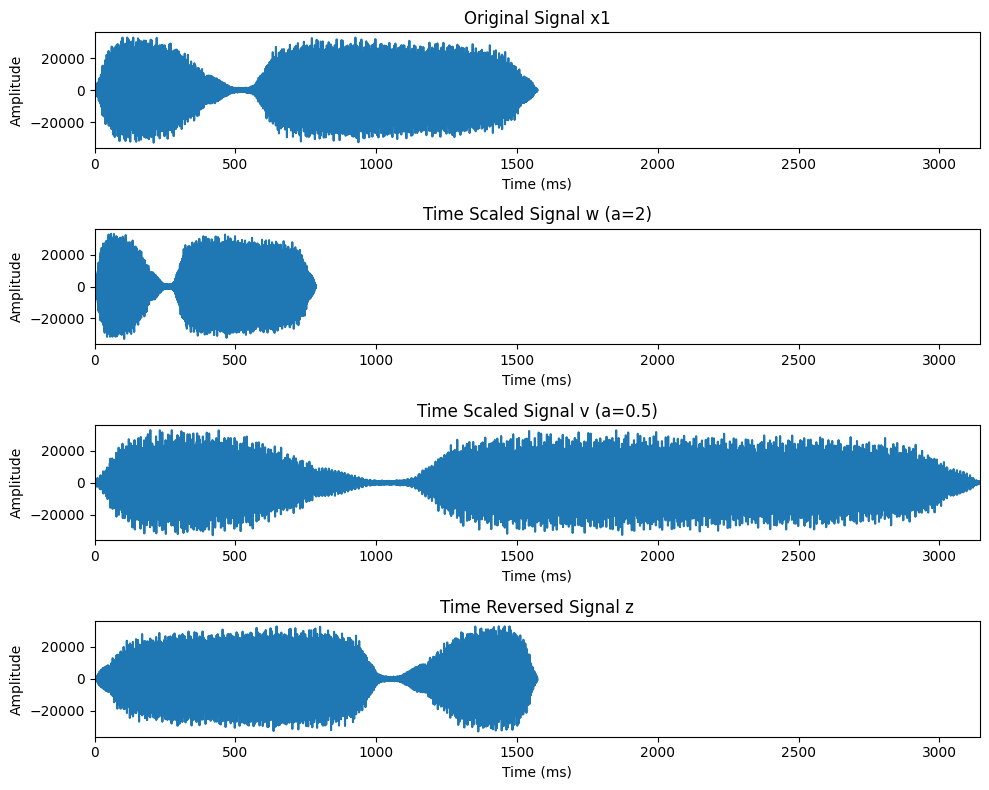

Button(description='Play Original', style=ButtonStyle())

Button(description='Play Time Scaled (a=2)', style=ButtonStyle())

Button(description='Play Time Scaled (a=0.5)', style=ButtonStyle())

Button(description='Play Time Reversed', style=ButtonStyle())

In [35]:
# Assignment 3: Time Scaling Audio Signals

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal as sig
from fractions import Fraction
from IPython.display import Audio, display
import ipywidgets as widgets
%matplotlib inline

# Part A: Replicating the Time Scale Function
# Read the WAV file while handling exceptions
try:
    # fs1: Sampling rate of the audio file
    # x1: Audio signal vector
    fs1, x1 = wavfile.read(r"C:\D\研究所\Q2\513\513HW1\train32.wav")
    x1 = x1.astype(np.float64)  # Convert audio signal to float64 for processing
except Exception as e:
    print("Error reading file:", e)
    exit()

# Define the timescale function to scale the audio signal in time
def timescale(x, fs, a):
    # Fraction used for resampling the signal
    fraction = Fraction.from_float(a).limit_denominator(1000)
    # Resample the signal using fractional values
    y = sig.resample_poly(x, fraction.denominator, fraction.numerator)
    # Create a time vector for the resampled signal
    t = np.arange(0, len(y), 1) * (1.0 / fs)
    return y, t

# Part B: Using the Time Scale Function
try:
    # Scale the signal by a factor of 2 (speed up)
    w, t_w = timescale(x1, fs1, 2)
    # Scale the signal by a factor of 0.5 (slow down)
    v, t_v = timescale(x1, fs1, 0.5)
except Exception as e:
    print("Error processing signal:", e)
    exit()

# Create a time-reversed version of the signal
z = x1[::-1]  # Reverse the audio signal
t_z = np.arange(len(z)) / fs1  # Time vector for the reversed signal

# Convert time vectors to milliseconds for plotting
t_x1 = np.arange(len(x1)) / fs1 * 1000
t_w *= 1000
t_v *= 1000
t_z *= 1000

# Part C: Plot the Four Signals
# Set up the plot for the four signals
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

# Plot original signal x1
axs[0].plot(t_x1, x1)
axs[0].set_title('Original Signal x1')
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Amplitude')

# Plot time-scaled signal w (a=2)
axs[1].plot(t_w, w)
axs[1].set_title('Time Scaled Signal w (a=2)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Amplitude')

# Plot time-scaled signal v (a=0.5)
axs[2].plot(t_v, v)
axs[2].set_title('Time Scaled Signal v (a=0.5)')
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Amplitude')

# Plot time-reversed signal z
axs[3].plot(t_z, z)
axs[3].set_title('Time Reversed Signal z')
axs[3].set_xlabel('Time (ms)')
axs[3].set_ylabel('Amplitude')

# Adjust x-axis limits for all plots to be consistent
max_t = max(t_x1[-1], t_w[-1], t_v[-1], t_z[-1])
for ax in axs:
    ax.set_xlim([0, max_t])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

# Part D: Save and Play the Signals
# Function to save audio files
def save_audio(signal, fs, filename):
    # Normalize and save signal as a WAV file
    signal_normalized = np.int16(signal/np.max(np.abs(signal)) * 32767)
    wavfile.write(filename, fs, signal_normalized)

# Function to create a button for playing audio
def create_play_button(file_path, label):
    # Create a button for playing an audio file
    button = widgets.Button(description=f"Play {label}")
    button.on_click(lambda _: display(Audio(filename=file_path, autoplay=True)))
    return button

# Save all audio files
save_audio(x1, fs1, 'original.wav')
save_audio(w, fs1, 'w.wav')
save_audio(v, fs1, 'v.wav')
save_audio(z, fs1, 'z.wav')

# Create and display buttons for each audio file
button_original = create_play_button('original.wav', "Original")
button_w = create_play_button('w.wav', "Time Scaled (a=2)")
button_v = create_play_button('v.wav', "Time Scaled (a=0.5)")
button_z = create_play_button('z.wav', "Time Reversed")

display(button_original, button_w, button_v, button_z)  # Display the audio playback buttons


## Discussion
### Effect of Multiple `figure` Commands in Plotting

In the given script, the `subplot` function is used to create multiple plots within a single figure. If a student runs the `figure` command before every call to `subplot`, several changes in the plot layout and presentation can be expected:

#### 1. Separate Windows for Each Plot
- **Current Behavior**: Currently, all plots are contained within a single figure window, allowing for easy comparison and a consolidated view.
- **Anticipated Change**: Introducing `figure` before each `subplot` would result in each plot being displayed in a separate figure window. This would lead to multiple windows popping up, each containing a single plot.

#### 2. Loss of Comparative Context
- **Analysis**: Having each plot in a separate window makes it more challenging to visually compare them side-by-side. The consolidated view offers an immediate visual comparison, which is especially valuable in signal processing where relative changes in signals are often critical.

#### 3. Increased Resource Usage
- **Technical Consideration**: Each additional figure window consumes more system resources. While this might not be a significant issue for a few plots, it can become problematic with a large number of figures, leading to slower performance or increased memory usage.

#### 4. Plot Management and Organization
- **User Experience**: Managing multiple figure windows can be cumbersome, especially if the user wants to compare specific aspects of each plot. The single-window approach provides a more organized and user-friendly experience.

### Recommendations for Effective Plotting
- **Consolidated Plotting**: Unless there is a specific need to isolate plots into separate windows (e.g., for distinct presentations or detailed individual analysis), it is generally more effective to use a single figure with multiple subplots.
- **Resource Consideration**: Be mindful of resource usage, especially in scripts that generate a large number of plots.
- **Plotting Strategy**: Consider the end goal of the plotting. If the aim is to compare data sets, a consolidated approach is usually more effective.

### Conclusion
In conclusion, while the use of multiple `figure` commands can be suitable for specific cases, the current implementation using a single figure with multiple subplots is more appropriate for comparative analysis and efficient resource usage in the context of this script.


## Assignment 4 -- Time Shift Operations

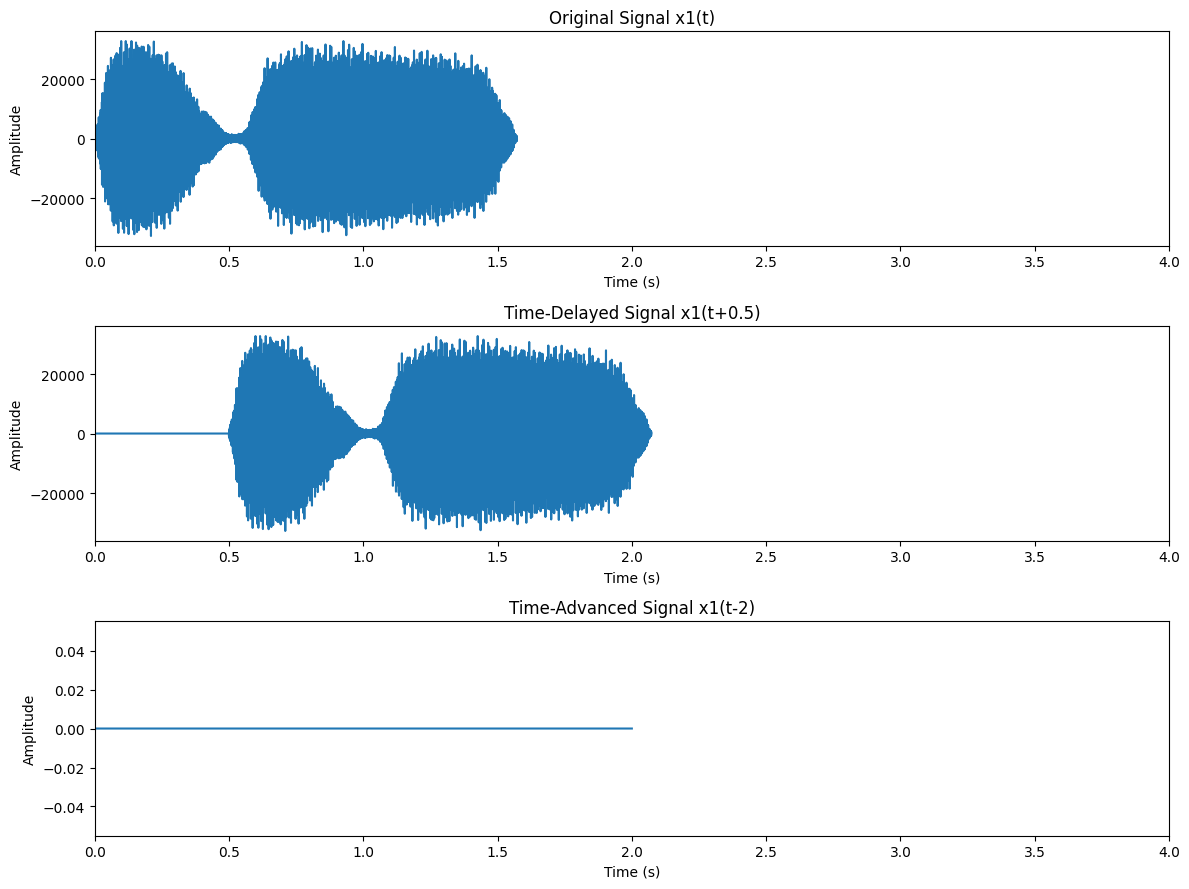

Playing original signal x1


Playing time-delayed signal x1(t+0.5)


Playing time-advanced signal x1(t-2)


c:\Users\Liliana\anaconda3\lib\site-packages\IPython\lib\display.py:187: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767
c:\Users\Liliana\anaconda3\lib\site-packages\IPython\lib\display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


In [4]:
# Assignment 4 - Time Shift Operation

# Part A - Writing the timeshift Function
import numpy as np

def timeshift(x, fs, t0):
    """
    Shifts the time axis of an audio signal.

    Inputs:
    - x: Numpy array, the input audio signal.
    - fs: Integer, the sampling rate of the signal in Hz.
    - t0: Float, the time shift in seconds. Positive for delay, negative for advance.

    Outputs:
    - y: Numpy array, the time-shifted signal.
    - t: Numpy array, the time vector corresponding to the shifted signal.

    This function shifts the audio signal in time. If the shift is positive, it delays the signal,
    padding the beginning with zeros. If the shift is negative, it advances the signal,
    and pads the end with zeros.
    """
    n0 = int(t0 * fs)
    if t0 > 0:
        # Time delay - pad the beginning with zeros
        y = np.concatenate((np.zeros(n0), x))
    else:
        # Time advance - pad the end with zeros
        y = np.concatenate((x[-n0:], np.zeros(-n0)))

    t = np.arange(len(y)) / fs
    return y, t

# Part B - Creating and Plotting Time-Shifted Signals
# Ensure x1 and fs1 are defined here
# x1, fs1 = wavfile.read('path_to_your_audio_file.wav')

# Apply time shift and create new signals
y1, t1 = timeshift(x1, fs1, 0.5)  # Apply time shift of +0.5 seconds
y2, t2 = timeshift(x1, fs1, -2)   # Apply time shift of -2 seconds

# Plotting the original and time-shifted signals
plt.figure(figsize=(12, 9))

# Plot original signal x1
plt.subplot(3, 1, 1)
plt.plot(np.arange(len(x1)) / fs1, x1)
plt.title('Original Signal x1(t)')
plt.xlim(0, 4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot time-delayed signal x1(t+0.5)
plt.subplot(3, 1, 2)
plt.plot(t1, y1)
plt.title('Time-Delayed Signal x1(t+0.5)')
plt.xlim(0, 4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot time-advanced signal x1(t-2)
plt.subplot(3, 1, 3)
plt.plot(t2, y2)
plt.title('Time-Advanced Signal x1(t-2)')
plt.xlim(0, 4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Part C: Playing the Signals
from IPython.display import Audio, display

# Handle NaNs and Infinities in the time-advanced signal
y2 = np.nan_to_num(y2)

# Ensure Correct Data Type and Range for audio playback
y2 = np.clip(y2, -32768, 32767).astype(np.int16)

# Play the original signal
print("Playing original signal x1")
display(Audio(x1, rate=fs1))

# Play the time-delayed signal
print("Playing time-delayed signal x1(t+0.5)")
display(Audio(y1, rate=fs1))

# Play the time-advanced signal
print("Playing time-advanced signal x1(t-2)")
display(Audio(y2, rate=fs1))


### **Discussion**
#### **Handling Edge Cases in Time Shift Operations**

In the implementation of the `timeshift` function, two edge cases are particularly noteworthy:

1. **Zero Time Shift**:
    - **Current Behavior**: When the shift is zero (`t0 = 0`), the function returns the original signal unaltered.
    - **Analysis**: This behavior is appropriate and expected. A zero shift should logically result in no change to the signal, and the function correctly handles this trivial case.

2. **Time Advance Greater Than Signal Length**:
    - **Current Behavior**: If the time advance is larger than the signal's duration, the function outputs an array of zeros.
    - **Analysis**: This is a logical outcome since advancing the signal beyond its length leaves no part of the original signal. However, the output signal retains the same length as the original, filled entirely with zeros.

3. **Time Delay or Advance Within Signal Length**:
    - **For Time Delay** (`t0 > 0`): The implementation correctly adds zeros at the beginning, delaying the signal.
    - **For Time Advance** (`t0 < 0`): The function appropriately removes the beginning part of the signal and appends zeros at the end, advancing the signal in time.

#### **Potential Improvements**

- **Efficient Handling of Large Advances**: For advances larger than the signal length, directly returning a zero-filled array could be more efficient.
- **Consistency in Output Length**: The decision to keep the output length identical to the original signal in all cases might need revisiting. Specifically, for a delay, the signal effectively becomes longer.
- **Documentation and Edge Cases**: Enhancing the function's documentation to include explicit statements about how these edge cases are handled can improve clarity and usability.

#### **Conclusion**

The `timeshift` function is effectively designed to handle typical cases of time delay and advance, as well as the trivial case of zero shift. While it correctly handles advances greater than the signal length, there is room for efficiency improvements and better clarity in handling and documenting edge cases.


## Bonus Problem: Create Your Own Sound Mash-Up

Button(description='Play Original', style=ButtonStyle())

Button(description='Play Mash-up', style=ButtonStyle())

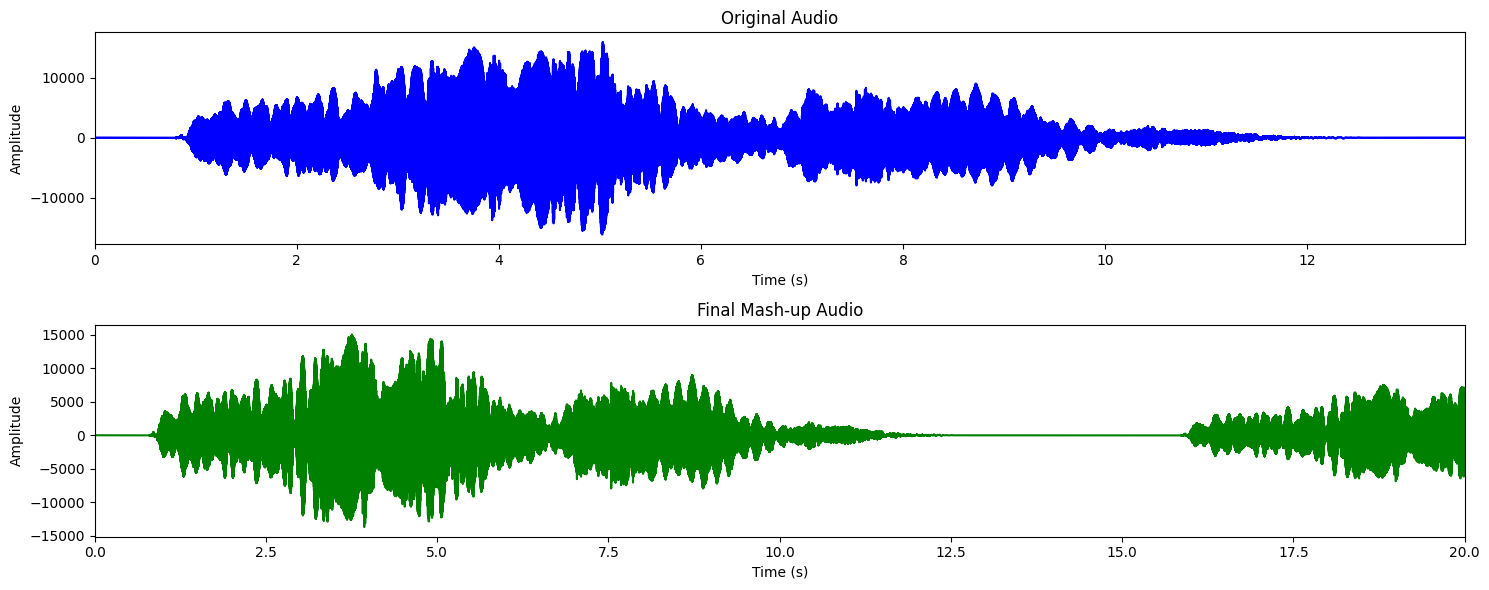

In [8]:
# Import necessary libraries
import numpy as np
from scipy.signal import resample_poly
from IPython.display import Audio, display
import ipywidgets as widgets
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Define the timescale function
# This function scales the time of an audio signal by a given factor 'a'.
# It uses resample_poly from scipy.signal to change the sample rate, effectively speeding up or slowing down the signal.
def timescale(x, fs, a):
    [n, d] = np.double(a).as_integer_ratio()  # Convert scaling factor 'a' to a fraction (numerator n, denominator d)
    scaled_signal = resample_poly(x, d, n)    # Resample the signal at a new rate
    time_vector = np.arange(0, len(scaled_signal)) / fs * (d / n)  # Calculate the new time vector for the scaled signal
    return scaled_signal, time_vector

# Define the timeshift function
# This function shifts an audio signal in time by a specified amount 't0' (in seconds).
# Positive 't0' delays the signal, and negative 't0' advances it.
def timeshift(x, fs, t0):
    n0 = int(t0 * fs)  # Calculate the number of samples to shift based on the sampling frequency
    if t0 > 0:
        shifted_signal = np.concatenate((np.zeros(n0), x))  # For delay, prepend zeros
    else:
        shifted_signal = x[-n0:] if abs(n0) < len(x) else np.zeros(len(x))  # For advance, truncate or pad with zeros
    time_vector = np.arange(0, len(shifted_signal)) / fs  # Generate new time vector for shifted signal
    return shifted_signal, time_vector

# Step 1: Preparing the Sounds
# Read an audio file 'flute11.wav' and extract the sampling frequency and audio data.
# If the audio is stereo, extract only one channel for simplicity.
fs_flute, flute = wavfile.read(r"C:\D\研究所\Q2\513\513HW1\flute11.wav")
if flute.ndim > 1:
    flute = flute[:, 0]  # Extract one channel in case of stereo audio

# Step 2: Signal Modifications
# Apply time scaling and shifting transformations to the audio signal.
flute_scaled, _ = timescale(flute, fs_flute, 1.5)  # Scale the time of the flute audio by a factor of 1.5
flute_shifted, _ = timeshift(flute, fs_flute, 0.5)  # Shift the time of the flute audio by 0.5 seconds

# Adjust the length of the scaled and shifted signals to be the same before adding them together.
len_min = min(len(flute_scaled), len(flute_shifted))
flute_scaled = flute_scaled[:len_min]
flute_shifted = flute_shifted[:len_min]

# Combine the signals by adding them together. Scale the result to prevent clipping.
mashup = 0.5 * (flute_scaled + flute_shifted)

# Step 3: Concatenation and Silence
# Add a segment of silence to the mashup.
silence = np.zeros(int(1 * fs_flute))  # Create a one-second silence
final_mashup = np.concatenate([flute, silence, mashup])  # Concatenate the original audio, silence, and the mashup

# Step 4: Saving the Final Mash-up
# Save the final mashup as a WAV file, ensuring the length is no more than 20 seconds.
final_mashup = final_mashup[:int(20 * fs_flute)]
wavfile.write('final_mashup.wav', fs_flute, final_mashup.astype(np.int16))

# Step 5: Add buttons to play the original and final mash-up audio files.
# Define a function to play audio files.
def play_audio(file_path):
    display(Audio(filename=file_path, autoplay=True))

# Create buttons for playing the original and mash-up audio files.
button_original = widgets.Button(description="Play Original")
button_mashup = widgets.Button(description="Play Mash-up")

# Define actions for button clicks to play the respective audio files.
def on_button_click_original(b):
    play_audio('flute11.wav')

def on_button_click_mashup(b):
    play_audio('final_mashup.wav')

# Attach the event handlers to the buttons and display them.
button_original.on_click(on_button_click_original)
button_mashup.on_click(on_button_click_mashup)
display(button_original, button_mashup)

# Plot the waveforms of the original and final mash-up audio files for visual comparison.
# Read the audio files and generate time vs amplitude plots.
fs_original, original_audio = wavfile.read('flute11.wav')
fs_mashup, mashup_audio = wavfile.read('final_mashup.wav')

# Set up the figure for plotting.
plt.figure(figsize=(15, 6))

# Plot the original audio.
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(original_audio)) / fs_original, original_audio, color='blue')
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, len(original_audio) / fs_original)

# Plot the final mash-up audio.
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(mashup_audio)) / fs_mashup, mashup_audio, color='green')
plt.title('Final Mash-up Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, len(mashup_audio) / fs_mashup)

# Adjust layout and show the plot.
plt.tight_layout()
plt.show()